Image successfully loaded!
Original Image Dimensions (Height of img, Width of img, (R,G,B)): (194, 259, 3)

 Classified Pixel Data
         R    G    B
0      191  233  255
1      146  186  235
2      133  166  237
3      130  158  242
4      115  140  232
...    ...  ...  ...
50241  140  171  228
50242  144  175  230
50243  145  175  229
50244  145  175  227
50245  145  175  227

[50246 rows x 3 columns]

Total pixels classified: 50246


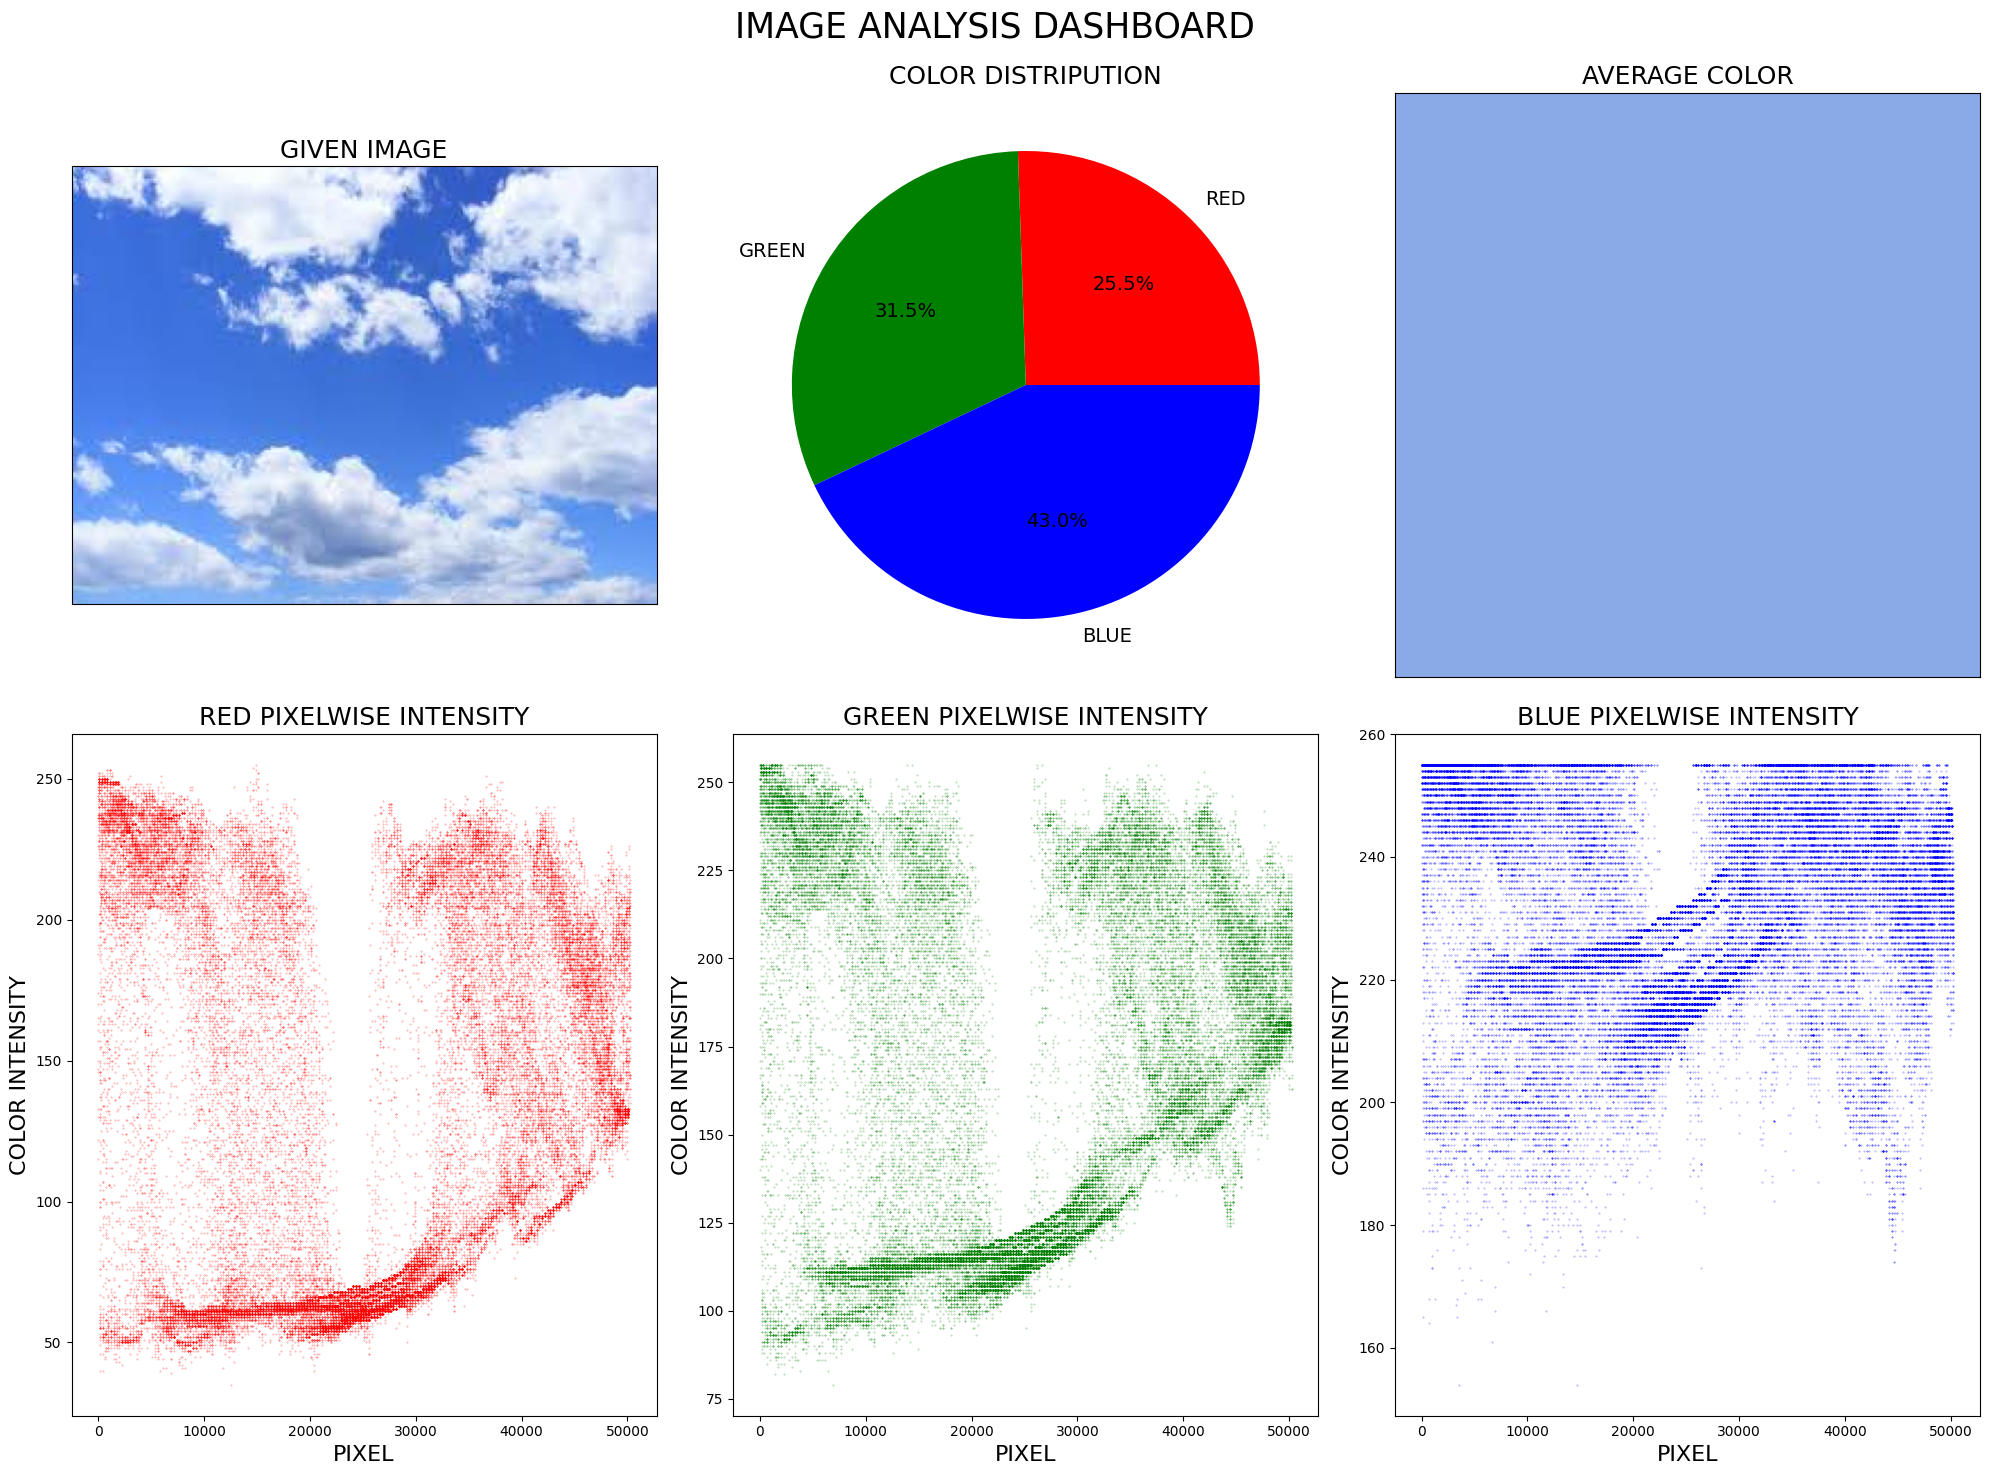

COLOR PLAETTE--> COOL
Image successfully loaded!
Original Image Dimensions (Height of img, Width of img, (R,G,B)): (1024, 1024, 3)

 Classified Pixel Data
          R   G   B
0        28  27  29
1        28  29  28
2        27  27  28
3        26  26  26
4        25  25  25
...      ..  ..  ..
1048571  35  27  22
1048572  35  28  24
1048573  37  28  23
1048574  37  29  25
1048575  39  30  26

[1048576 rows x 3 columns]

Total pixels classified: 1048576


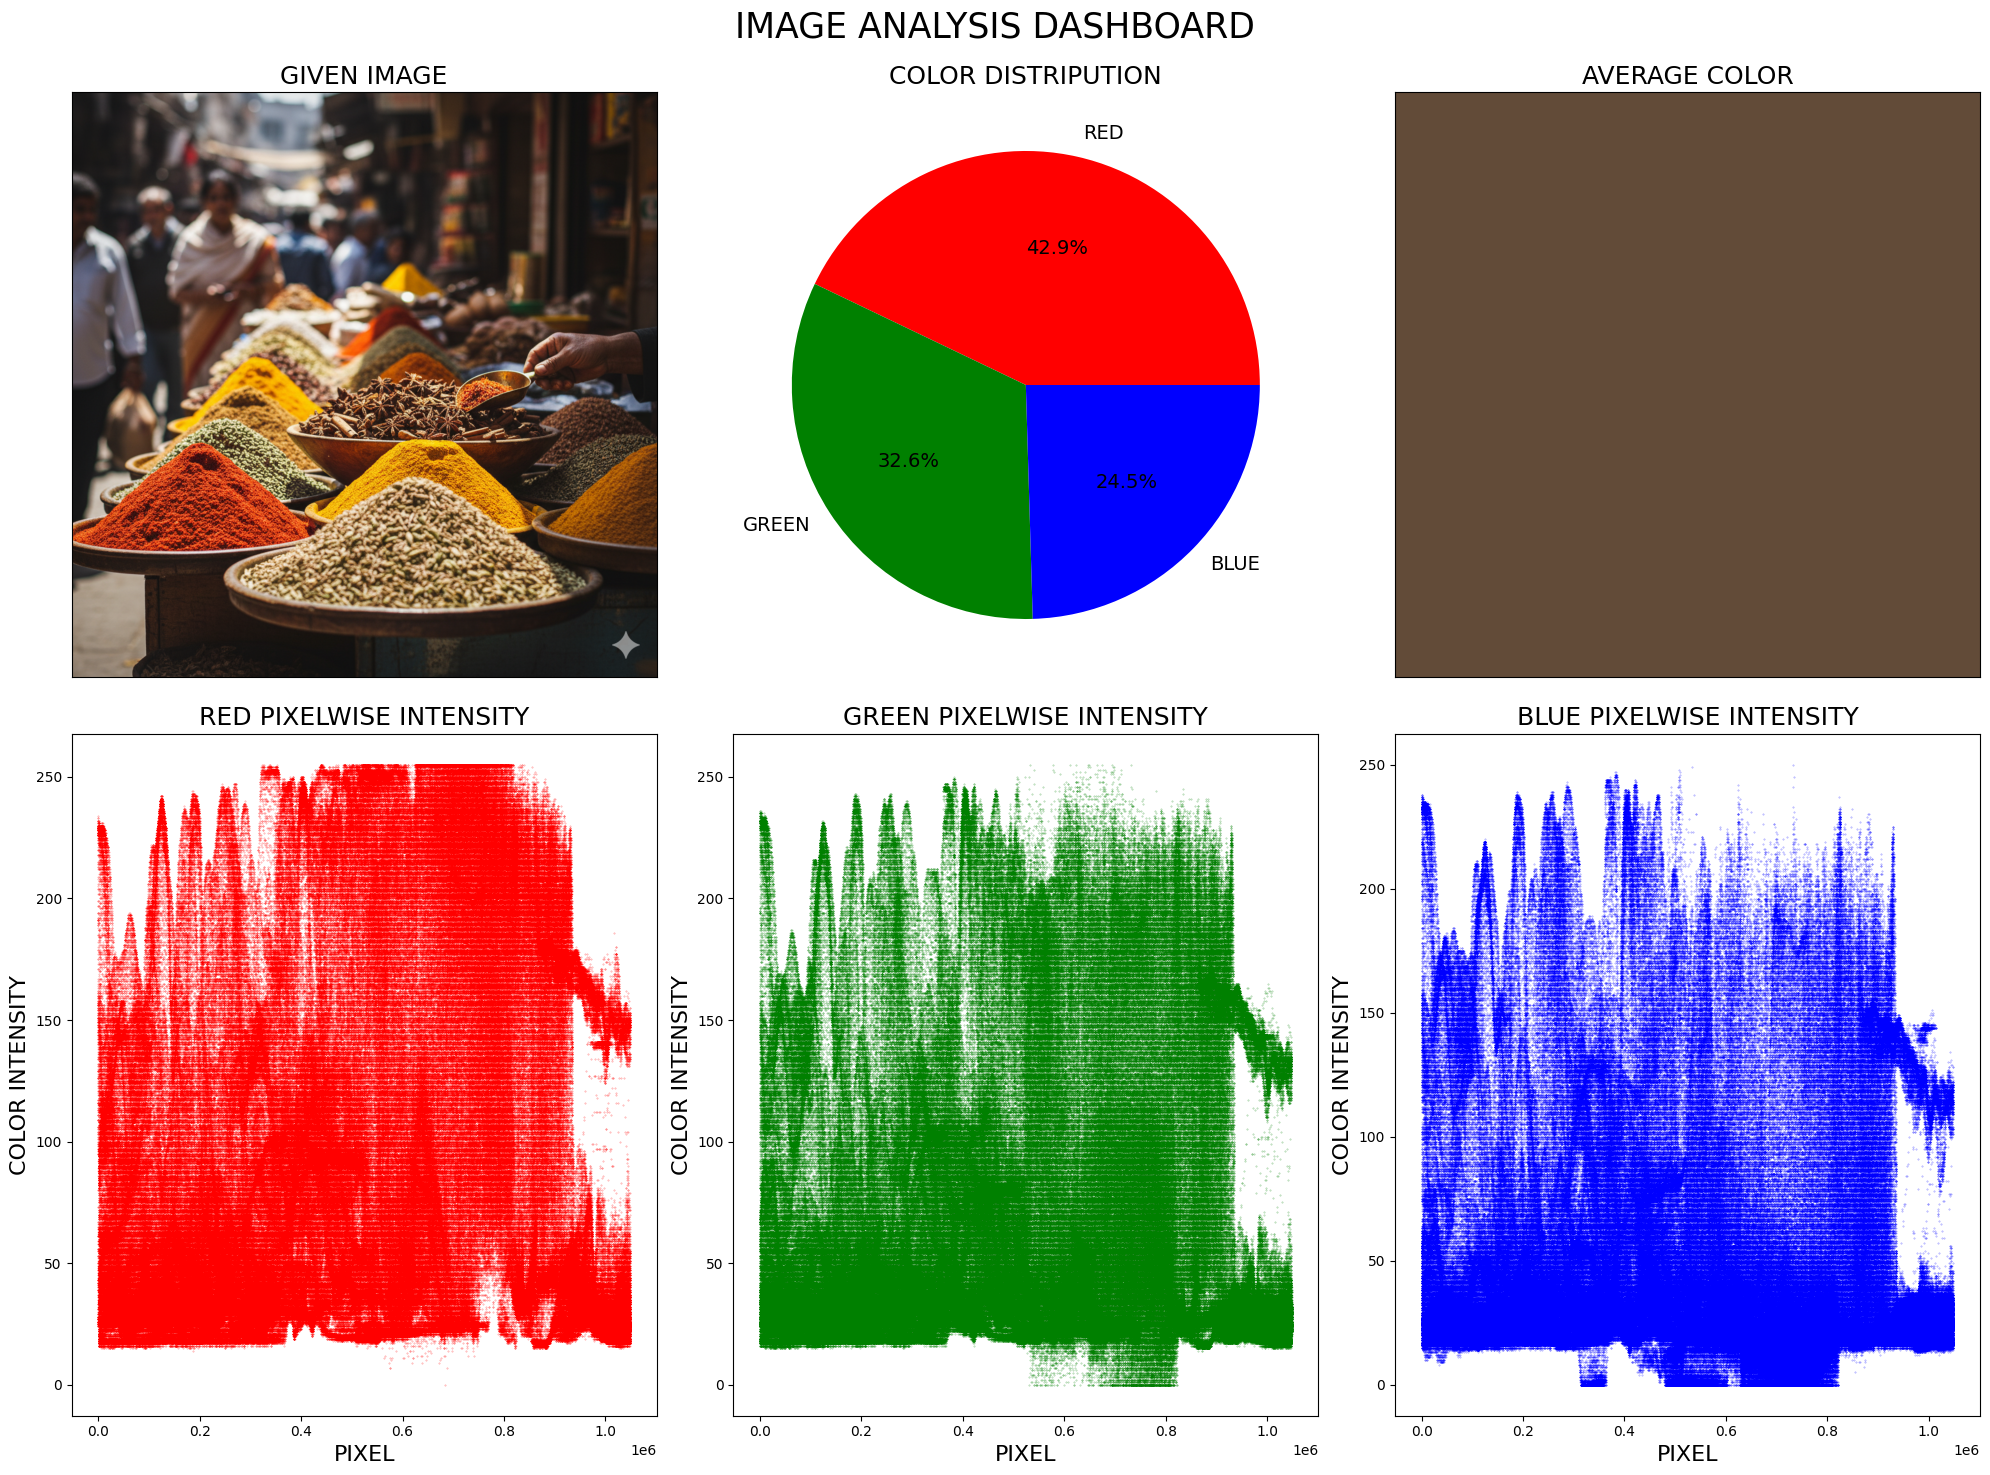

COLOR PLAETTE--> WARM
Image successfully loaded!
Original Image Dimensions (Height of img, Width of img, (R,G,B)): (1024, 1024, 3)

 Classified Pixel Data
          R   G   B
0        47  57  56
1        50  60  55
2        52  62  59
3        56  65  63
4        61  69  66
...      ..  ..  ..
1048571  32  34  27
1048572  32  35  28
1048573  32  35  29
1048574  33  35  31
1048575  33  35  30

[1048576 rows x 3 columns]

Total pixels classified: 1048576


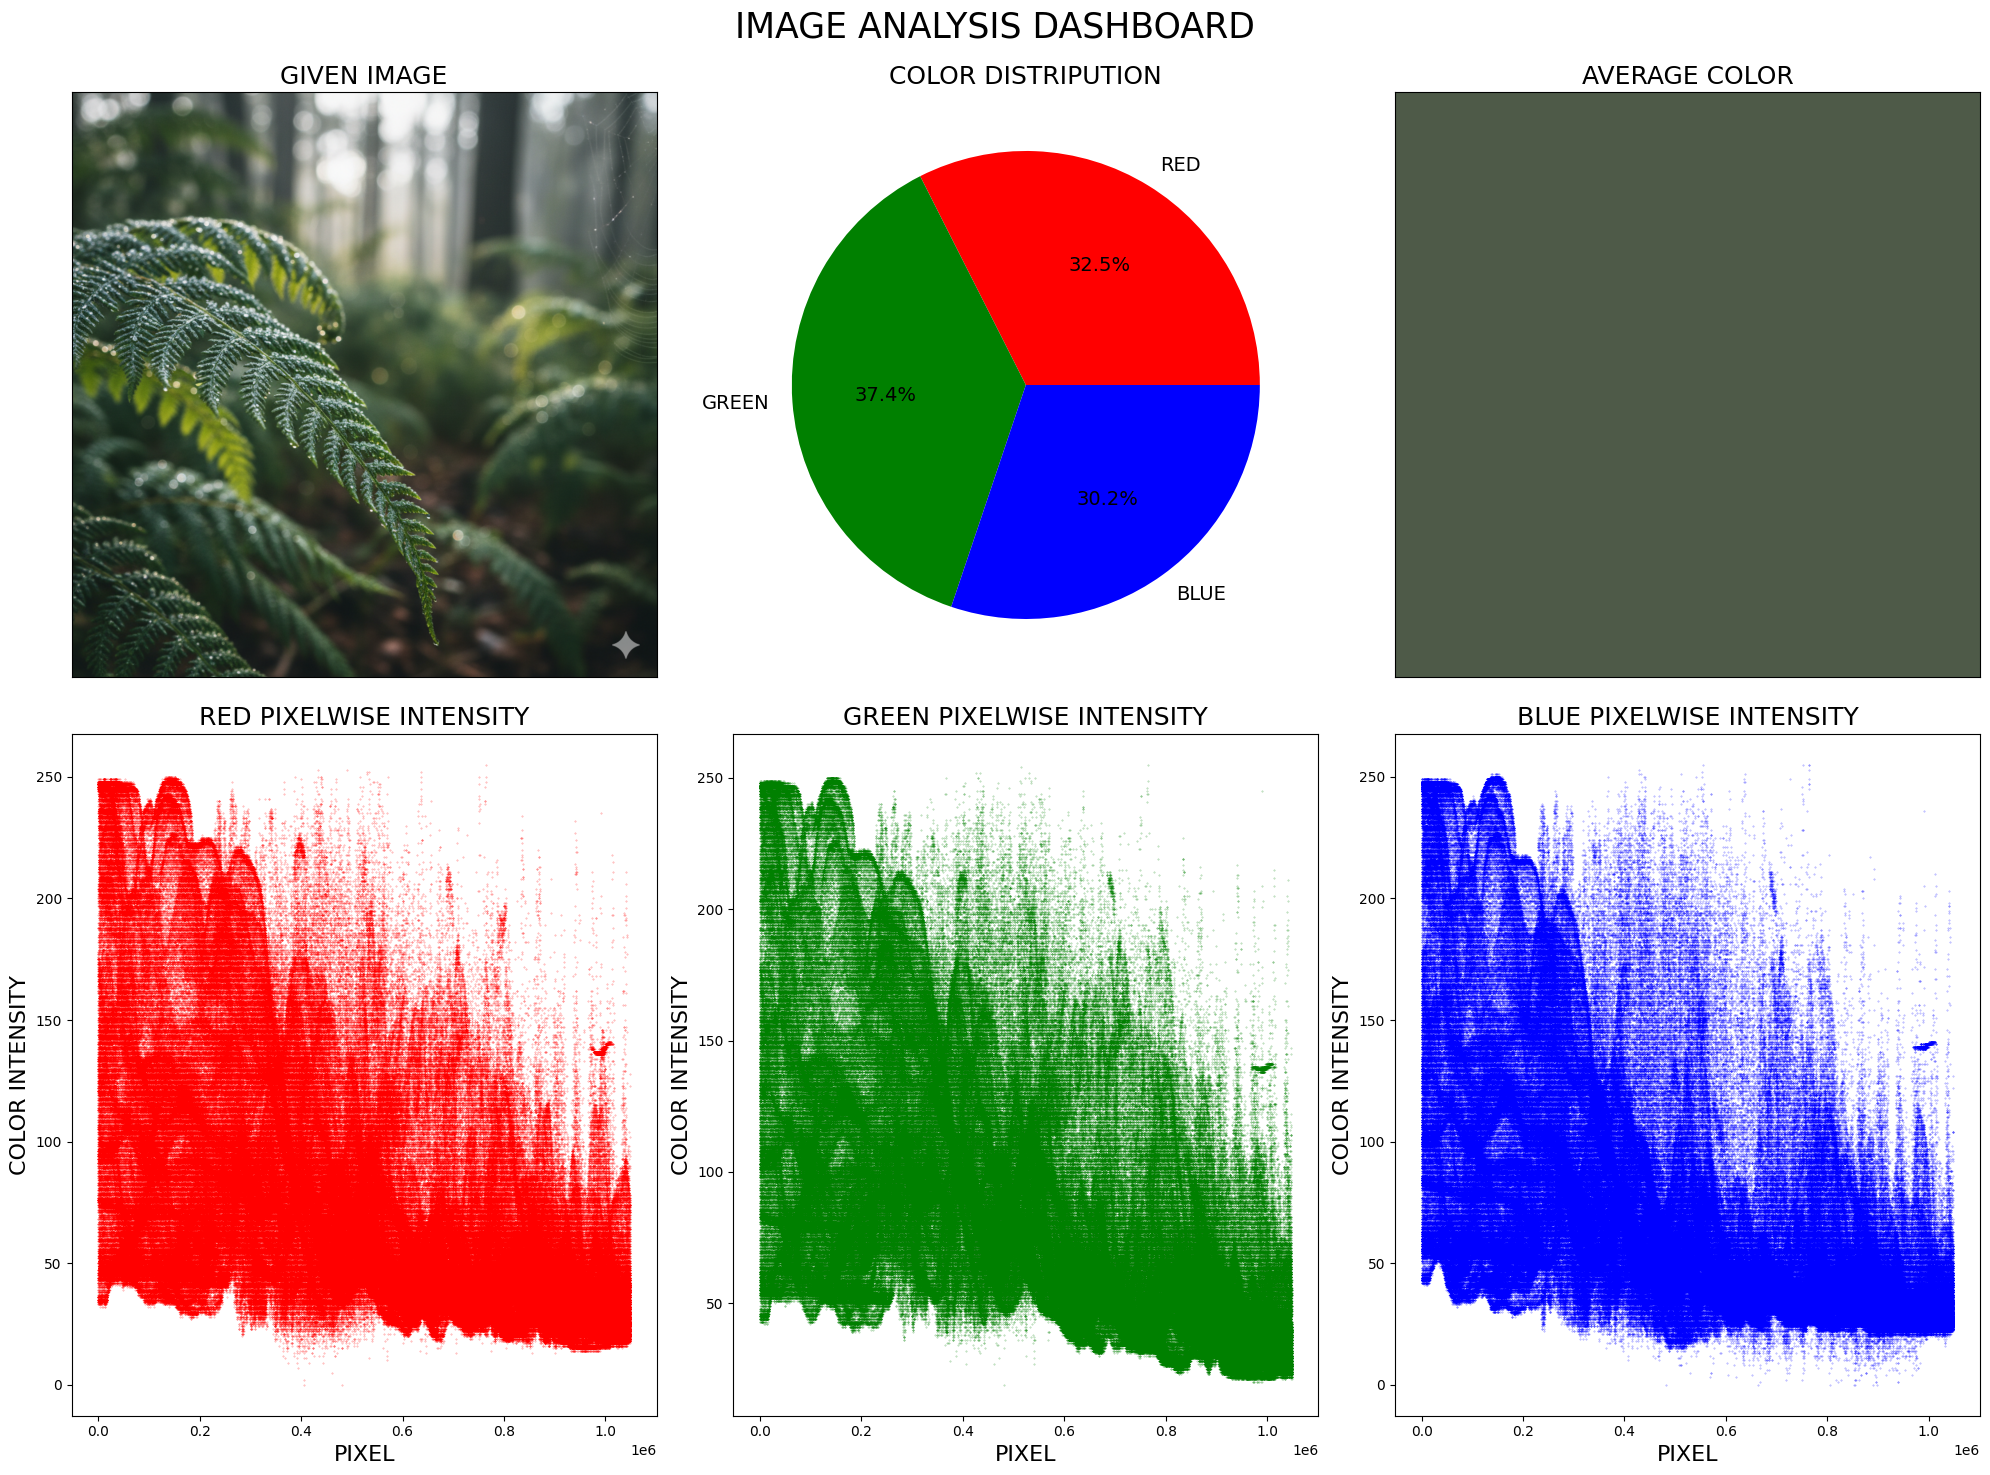

COLOR PLAETTE--> WARM


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import os


def dashboard(image_file):
    if not os.path.exists(image_file):
        print(f"Error: File '{image_file}' not found. Please check the path and name.")
    else:
        try:
        
            img = Image.open(image_file)
        
            img_array = np.asarray(img)
        
            print(f"Image successfully loaded!")
            print(f"Original Image Dimensions (Height of img, Width of img, (R,G,B)): {img_array.shape}")
        
        
            num_pixels = img_array.shape[0] * img_array.shape[1]
            pixel_data_2d = img_array.reshape(num_pixels, 3)
        
            df_pixels = pd.DataFrame(pixel_data_2d, columns=['R', 'G', 'B'])

            print("\n Classified Pixel Data")
            print(df_pixels)
        
            print(f"\nTotal pixels classified: {len(df_pixels)}")
        
        except Exception as e:
            print(f"An error occurred during processing: {e}")

    plt.figure(figsize=(20, 15))
    #IMAGE 
    plt.subplot(2,3,1)
    plt.title("GIVEN IMAGE",fontsize=18)
    plt.imshow(np.asarray(img))
    plt.xticks([])
    plt.yticks([])
    plt.box(True) 

    #AVG COLOR
    plt.subplot(2,3,3)
    avg_r=(df_pixels["R"].mean())/255
    avg_g=(df_pixels["G"].mean())/255
    avg_b=(df_pixels["B"].mean())/255
    avg_color=(avg_r,avg_g,avg_b)
    color_block = np.full((1, 1, 3), (avg_color))
    plt.xticks([])
    plt.yticks([])
    plt.title("AVERAGE COLOR",fontsize=18)
    plt.box(True) 
    plt.imshow(color_block)

    indexes=np.arange(len(df_pixels))
    arr_r=df_pixels["R"].to_numpy()
    arr_g=df_pixels["G"].to_numpy()
    arr_b=df_pixels["B"].to_numpy()

    #PIE CHART
    plt.subplot(2,3,2)
    plt.pie([np.sum(arr_r),np.sum(arr_g),np.sum(arr_b)],labels=["RED","GREEN","BLUE"],textprops={'fontsize': 14},colors=["red","green","blue"],autopct="%1.1f%%")
    plt.title("COLOR DISTRIPUTION",fontsize=18)
    
    plt.subplot(2,3,4)
    plt.scatter(indexes,arr_r,color="red",s=0.5,alpha=0.4,marker='.',label="Red Intensity")
    plt.xlabel("PIXEL",fontsize=16)
    plt.ylabel("COLOR INTENSITY",fontsize=16)
    plt.title("RED PIXELWISE INTENSITY",fontsize=18)

    plt.subplot(2,3,5)
    plt.scatter(indexes,arr_g,color="green",s=0.5,alpha=0.4,marker='.',label="green Intensity")
    plt.xlabel("PIXEL",fontsize=16)
    plt.ylabel("COLOR INTENSITY",fontsize=16)
    plt.title("GREEN PIXELWISE INTENSITY",fontsize=18)

    plt.subplot(2,3,6)
    plt.scatter(indexes,arr_b,color="blue",s=0.5,alpha=0.4,marker='.',label="blue Intensity")
    plt.xlabel("PIXEL",fontsize=16)
    plt.ylabel("COLOR INTENSITY",fontsize=16)
    plt.title("BLUE PIXELWISE INTENSITY",fontsize=18)

    plt.suptitle("IMAGE ANALYSIS DASHBOARD",fontsize=25)

    plt.tight_layout()
    plt.show()

    print("COLOR PLAETTE-->",end=" ")
    if avg_r>avg_b:
        print("WARM")
    else:
        print("COOL")

dashboard("sky.jpeg")
dashboard("spices.png")
dashboard("nature.png")

